# Exploratory Data Analysis - Terrorism

### Import Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Display Data

In [2]:
data = pd.read_csv('globalterrorismdb.csv', encoding='latin1')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
# Checking the shape of data

data.shape

(181691, 135)

### Renaming Features

In [6]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
# renaming the features

data.rename(columns={'iyear' : 'year', 'imonth' : 'month', 'iday' : 'day', 'country_txt':'Country', 
                     'region_txt':'Region', 'provstate':'State', 'gname' :'group', 'city':'city',
                     'latitude':'latitude', 'longitude' : 'longitude', 'summary' : 'summary', 
                     'attacktype1_txt' : 'attack_type', 'weaptype1_txt': 'weapon_type', 
                     'targtype1_txt':'target_type', 'nkill': 'kill', 'nwound':'wound',}, 
            inplace=True)

In [8]:
data = data[['year', 'month', 'day', 'Country', 'Region', 'city', 'latitude', 
             'longitude', 'summary', 'success', 'suicide', 'attack_type',  'target_type', 'target1', 'group', 'motive', 'weapon_type', 
             'kill', 'wound']]
    
data.head()

,year,month,day,Country,Region,city,latitude,longitude,summary,success,suicide,attack_type,target_type,target1,group,motive,weapon_type,kill,wound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,1,0,Assassination,Journalists & Media,Employee,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,NaN,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN


### Handling the missing values

In [9]:
# checking for the missing values

data.isnull().sum()

year                0
month               0
day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
summary         66129
success             0
suicide             0
attack_type         0
target_type         0
target1           636
group               0
motive         131130
weapon_type         0
kill            10313
wound           16311
dtype: int64

In [10]:
# filling the missing values

# data['city'] = data['city'].fillna('Unknown')
data['wound'] = data['wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [11]:
# Adding one new column : casualities

data['casualities'] = data['kill'] + data['wound']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   summary      115562 non-null  object 
 9   success      181691 non-null  int64  
 10  suicide      181691 non-null  int64  
 11  attack_type  181691 non-null  object 
 12  target_type  181691 non-null  object 
 13  target1      181055 non-null  object 
 14  group        181691 non-null  object 
 15  motive       50561 non-null   object 
 16  weapon_type  181691 non-null  object 
 17  kill         181691 non-null  float64
 18  wound        181691 non-

In [13]:
data.describe()

,year,month,day,latitude,longitude,success,suicide,kill,wound,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,9574.000000


### Checking the correlation

In [14]:
data.corr()

,year,month,day,latitude,longitude,success,suicide,kill,wound,casualities
year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.137736,0.021252,0.017484,0.020675
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003071,0.004031,0.003178,0.003805
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,0.003593,-0.003225,-0.001082,-0.001808
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,0.068682,-0.013170,0.015920,0.009899
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,0.000486,-0.000587,0.000205,0.000013
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,-0.031155,0.049619,0.023346,0.033487
suicide,0.137736,0.003071,0.003593,0.068682,0.000486,-0.031155,1.000000,0.136385,0.096101,0.119057
kill,0.021252,0.004031,-0.003225,-0.013170,-0.000587,0.049619,0.136385,1.000000,0.443326,0.651885
wound,0.017484,0.003178,-0.001082,0.015920,0.000205,0.023346,0.096101,0.443326,1.000000,0.968724
casualities,0.020675,0.003805,-0.001808,0.009899,0.000013,0.033487,0.119057,0.651885,0.968724,1.000000


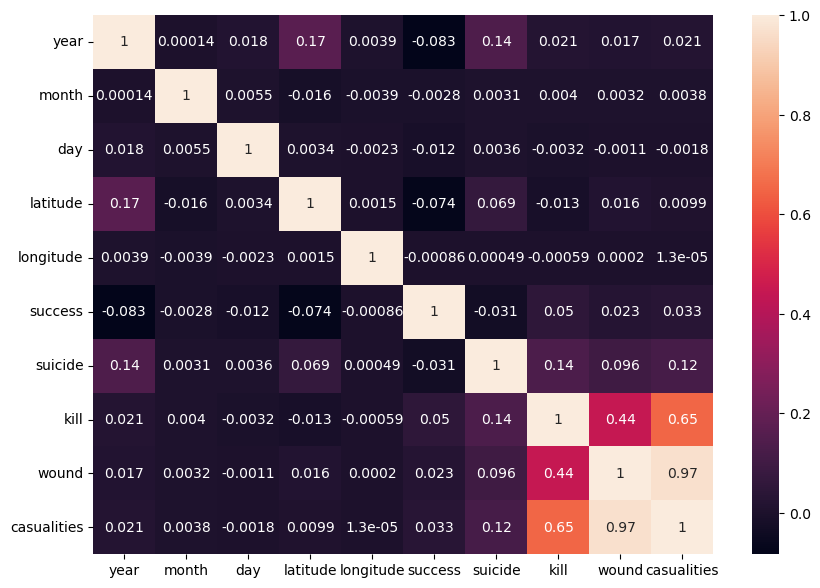

In [15]:
# heatmap

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
data['year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

In [17]:
# making sure the datatypes are changed
data.dtypes

year             int64
month            int64
day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
summary         object
success          int64
suicide          int64
attack_type     object
target_type     object
target1         object
group           object
motive          object
weapon_type     object
kill           float64
wound          float64
casualities    float64
dtype: object

In [18]:
# checking the total number of unique years

data['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

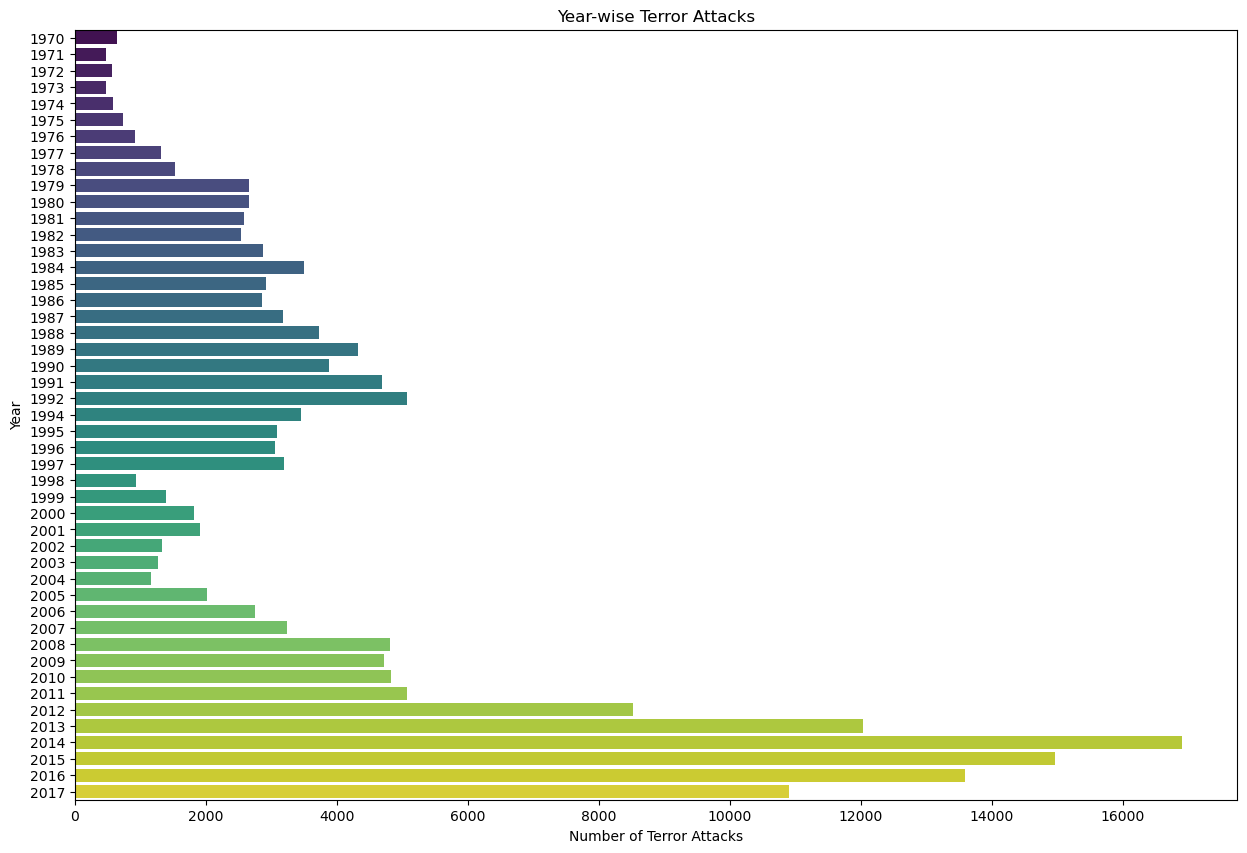

In [19]:
# year-wise terror attacks

plt.figure(figsize=(15,10))
sns.countplot(data = data, y = 'year', palette = 'viridis')
plt.title('Year-wise Terror Attacks')
plt.xlabel('Number of Terror Attacks')
plt.ylabel('Year')
plt.show()

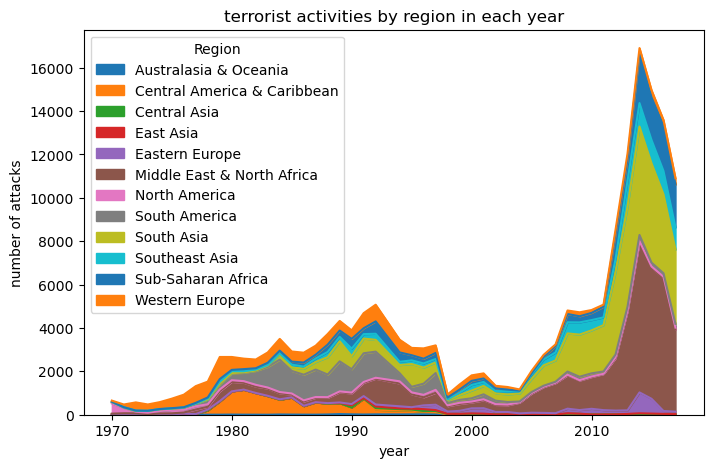

In [20]:
pd.crosstab(data.year, data.Region).plot(kind = 'area', figsize=(8,5))
plt.title('terrorist activities by region in each year')
plt.ylabel('number of attacks')
plt.show()

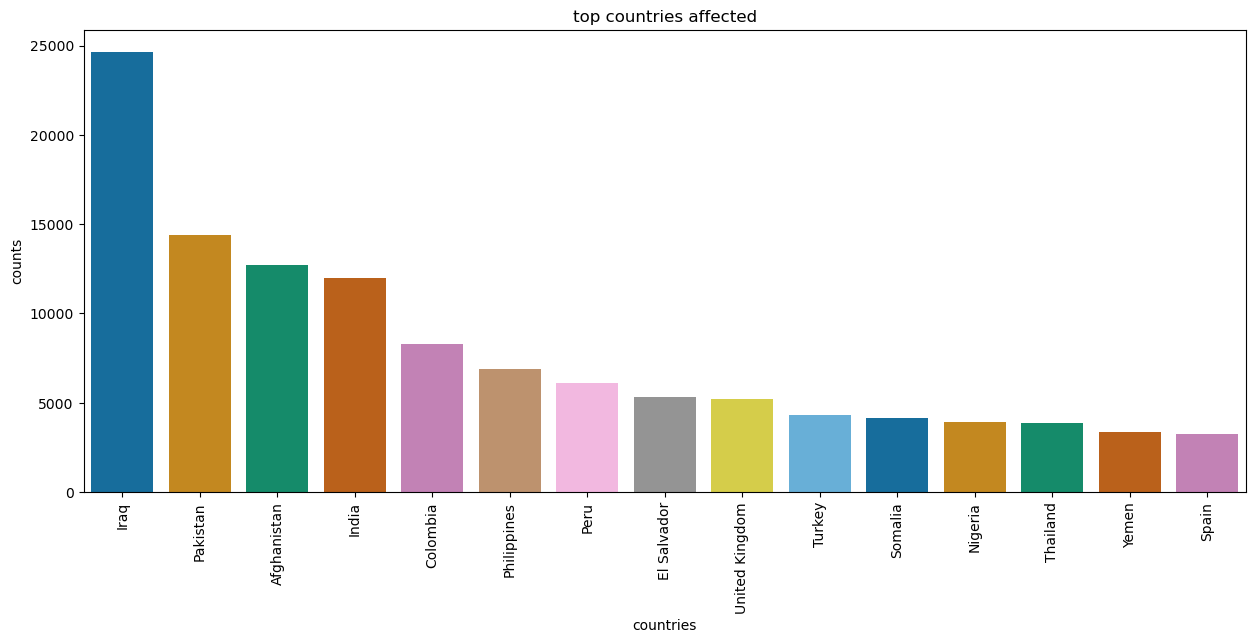

In [21]:
# top 15 countries that have suffered a lot

plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index, 
            data['Country'].value_counts()[:15], palette = 'colorblind')
plt.title('top countries affected')
plt.xlabel('countries')
plt.ylabel('counts')
plt.xticks(rotation = 90)
plt.show()

Text(0, 0.5, 'Casualties')

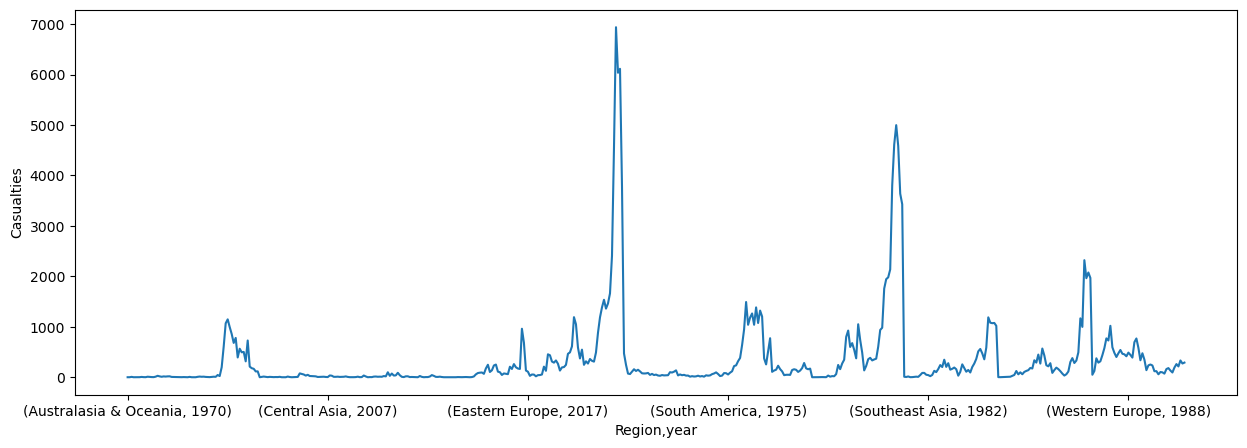

In [22]:
# plotting year and region casualty

plt.subplots(figsize=(15,5))
data.groupby(['Region', 'year']).count()['casualities'].plot()
plt.ylabel('Casualties')

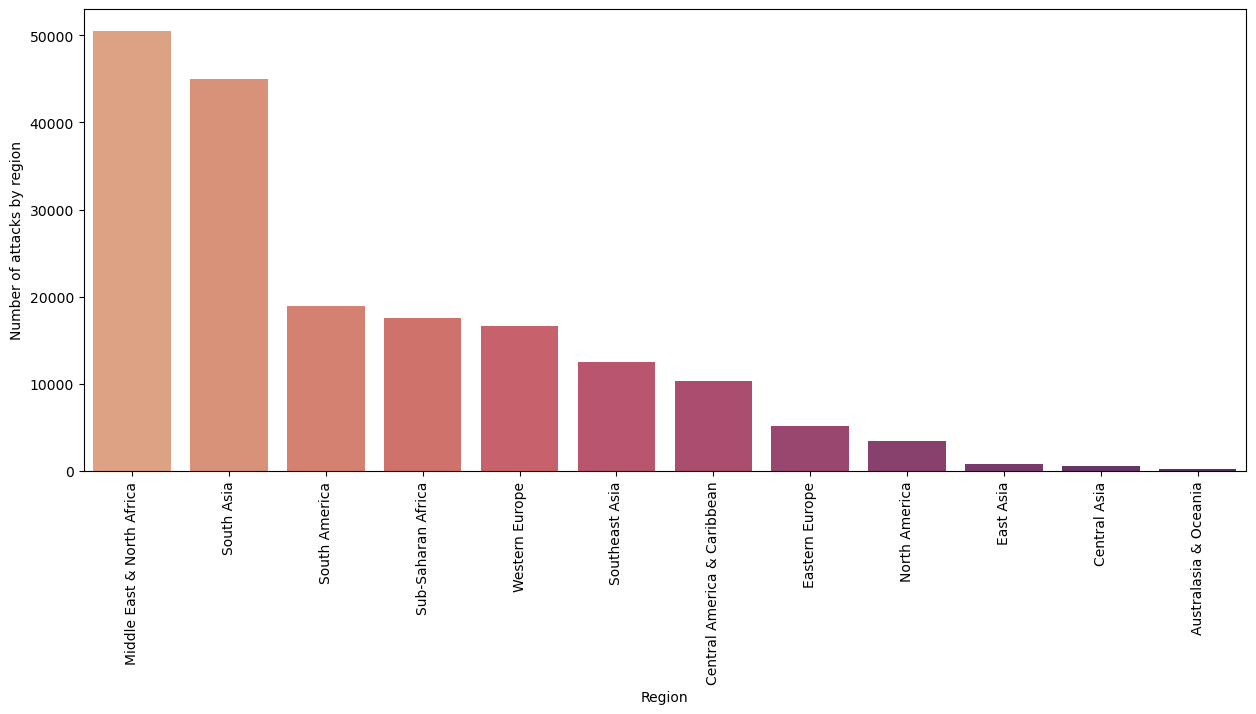

In [23]:
#  number of attacks by region

plt.subplots(figsize=(15,6))
sns.countplot('Region', data = data, palette = 'flare', 
              order = data['Region'].value_counts().index)
plt.xlabel('Region')
plt.ylabel('Number of attacks by region')
plt.xticks(rotation = 90)
plt.show()

In [24]:
# weapon data

weapon_data = data['weapon_type'].value_counts()
weapon_data

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

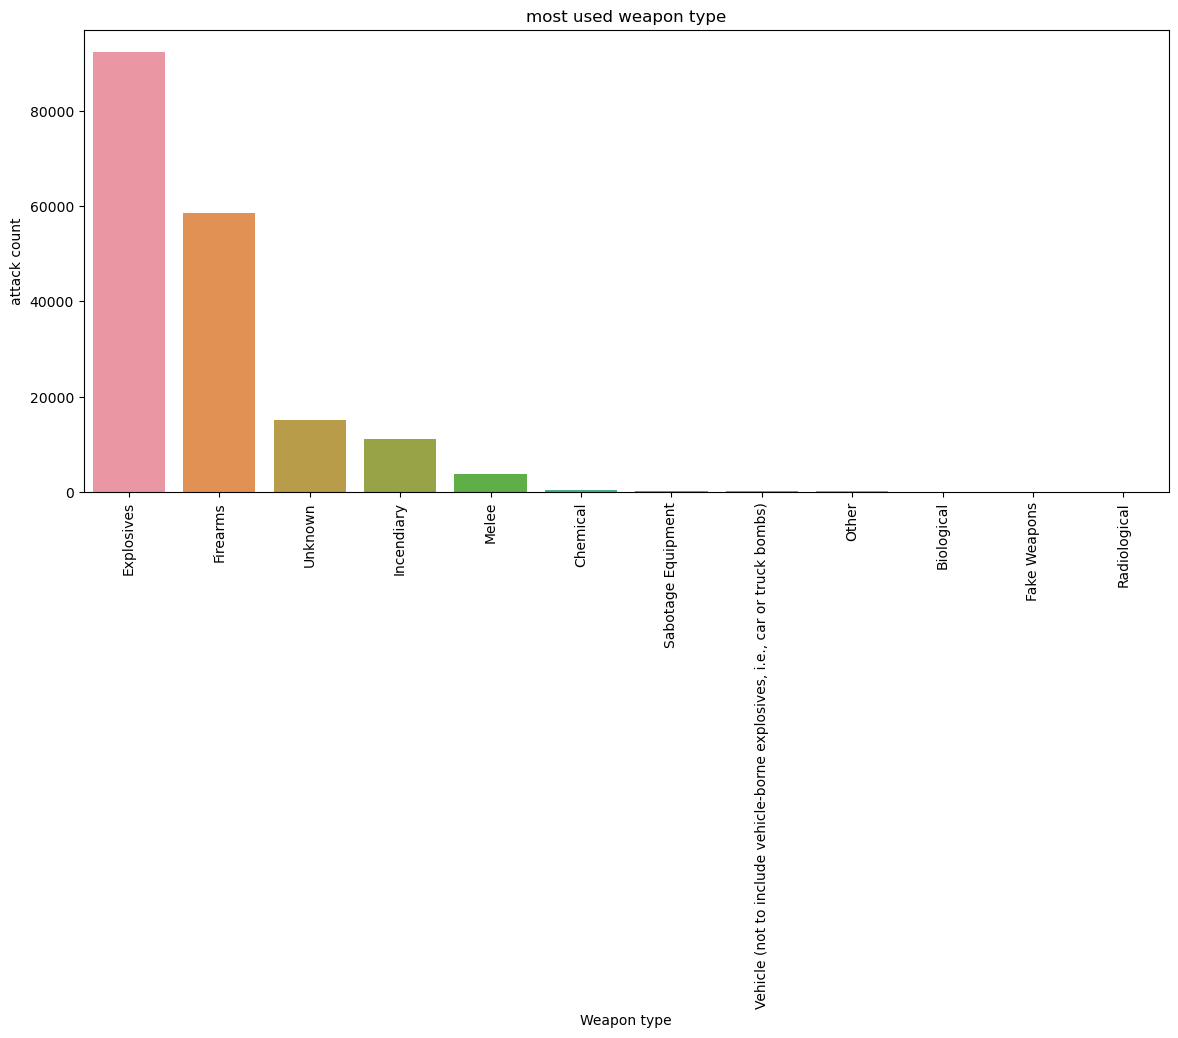

In [25]:
plt.figure(figsize=(14,6))
sns.barplot(x = weapon_data.index, y = weapon_data.values)
plt.title('most used weapon type')
plt.xlabel('Weapon type')
plt.ylabel('attack count')
plt.xticks(rotation = 90)
plt.show()

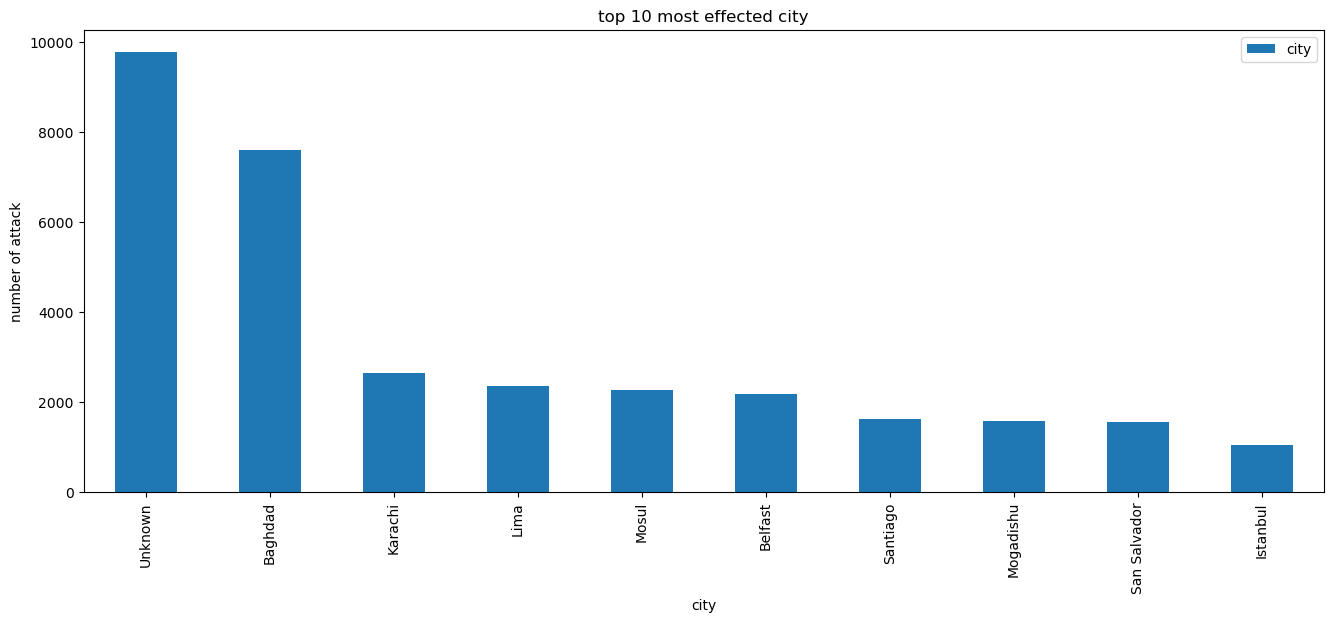

In [26]:
data['city'].value_counts().to_frame().sort_values('city', axis = 0, ascending = False).head(10).plot(kind = 'bar', figsize = (16,6))
plt.title('top 10 most effected city')
plt.xlabel('city')
plt.ylabel('number of attack')
plt.show()

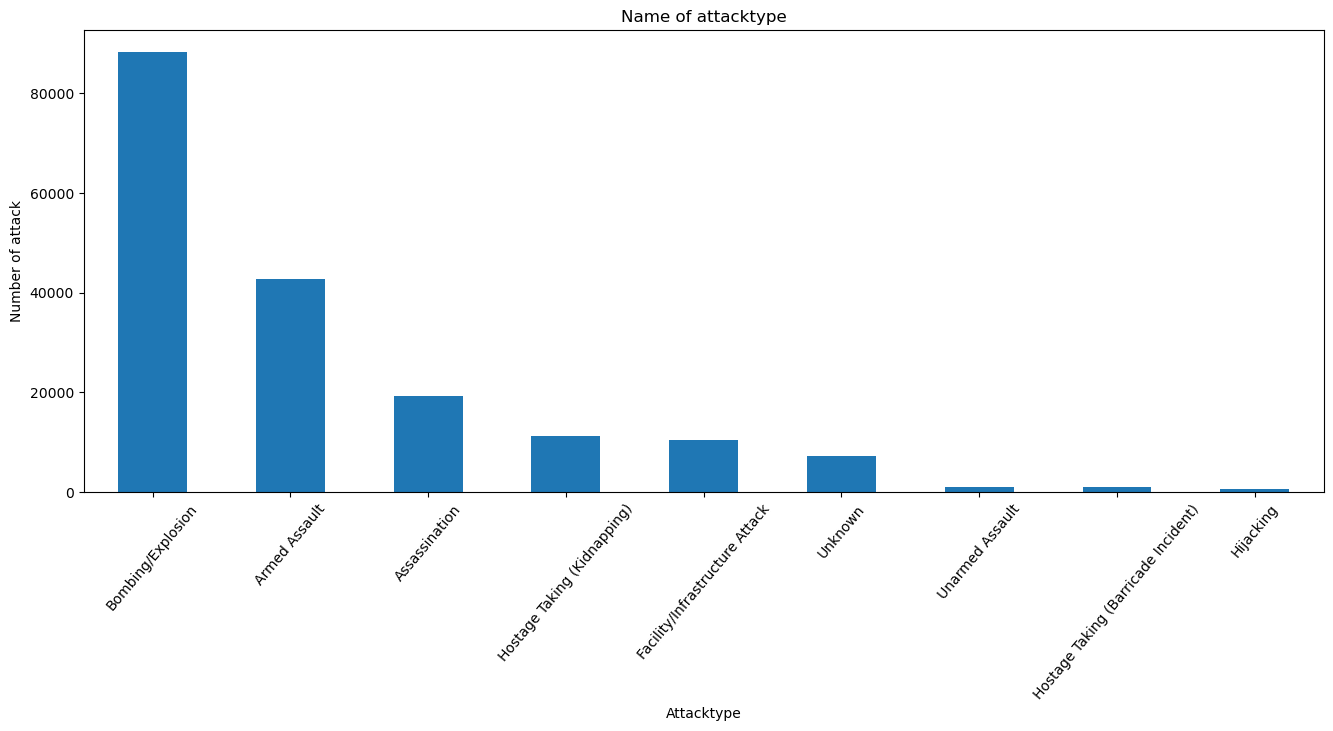

In [27]:
data['attack_type'].value_counts().plot(kind = 'bar',figsize = (16,6))
plt.xticks(rotation = 50)
plt.xlabel("Attacktype")
plt.ylabel("Number of attack")
plt.title("Name of attacktype")
plt.show()

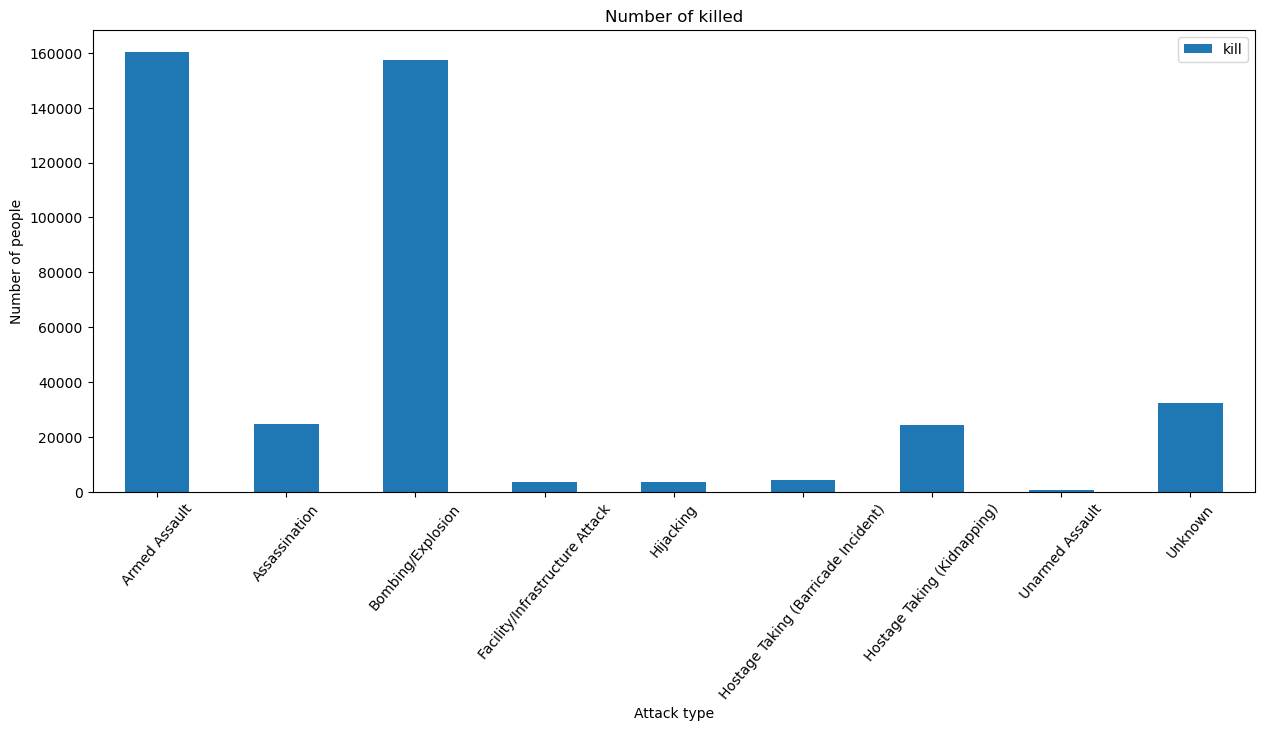

In [28]:
data[['attack_type','kill']].groupby(['attack_type'],axis = 0).sum().plot(kind='bar',figsize=(15,6))
plt.xticks(rotation=50)
plt.title('Number of killed')
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show()

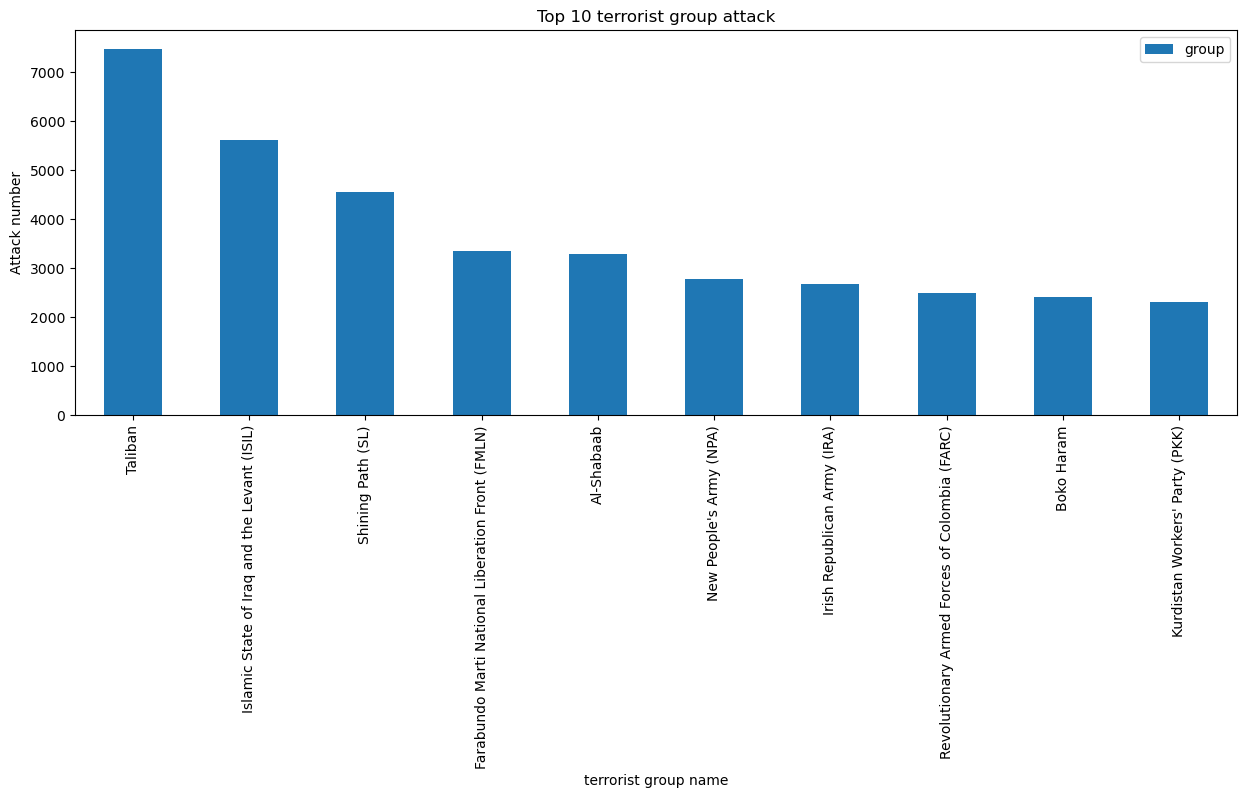

In [29]:
data['group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar', figsize=(15, 5))
plt.title("Top 10 terrorist group attack")
plt.xlabel("terrorist group name")
plt.ylabel("Attack number")
plt.show()

In [30]:
target_data = data['target_type'].value_counts().nlargest(n = 15)
target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: target_type, dtype: int64

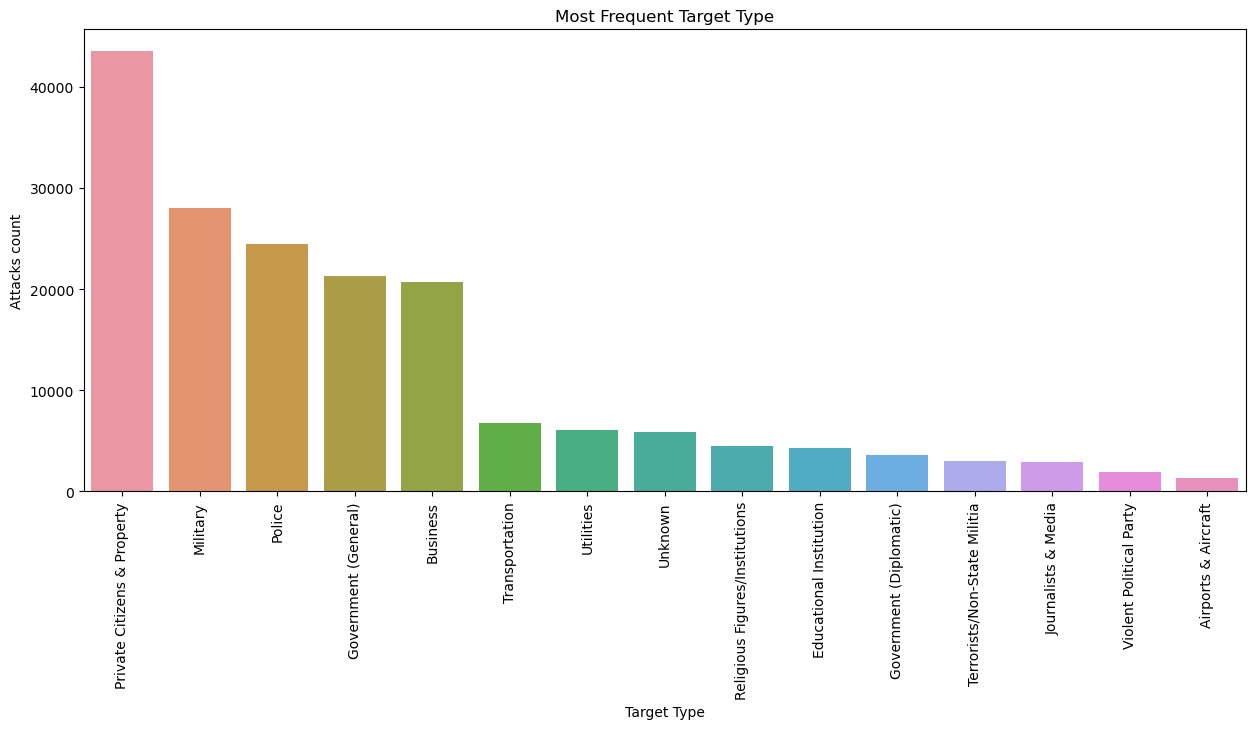

In [31]:
plt.figure(figsize= (15,6))
sns.barplot(x = target_data.index , y = target_data.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

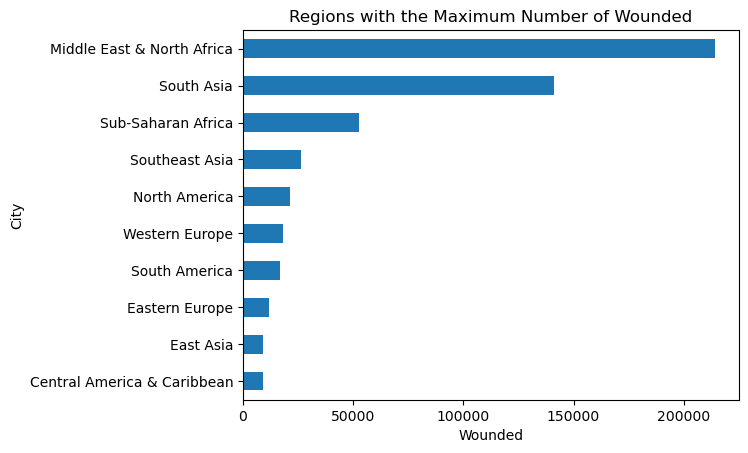

In [32]:
# region-wise wounded
data.groupby('Region')['wound'].sum().nlargest(n=10).sort_values(ascending=True).plot.barh(legend=False)
plt.xlabel('Wounded')
plt.ylabel('City')
plt.title('Regions with the Maximum Number of Wounded')
plt.show()

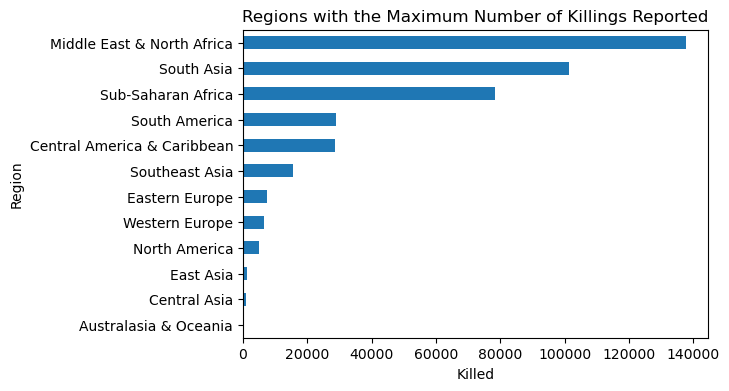

In [33]:
# region-wise killed

data.groupby('Region')['kill'].sum().sort_values(ascending=True).plot.barh(legend=False, figsize=(6,4))
plt.xlabel('Killed')
plt.ylabel('Region')
plt.title('Regions with the Maximum Number of Killings Reported')
plt.show()

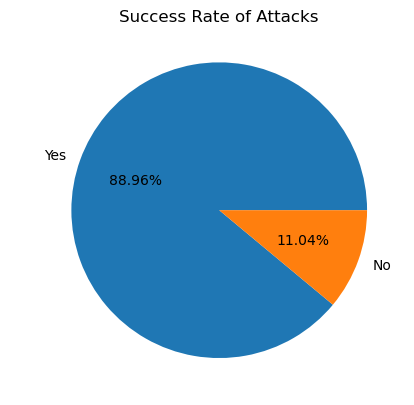

In [34]:
plt.pie(data['success'].value_counts(normalize=True), labels=['Yes', 'No'], autopct='%.2f%%')
plt.ylabel(' ')
plt.title('Success Rate of Attacks', pad = 3)
plt.show()

In [35]:
data.groupby('Region')['suicide'].sum().sort_values()

Region
Australasia & Oceania             1
Central America & Caribbean       1
South America                     6
Central Asia                     11
North America                    16
East Asia                        17
Western Europe                   23
Southeast Asia                   28
Eastern Europe                   92
Sub-Saharan Africa              740
South Asia                     1926
Middle East & North Africa     3772
Name: suicide, dtype: int64

In [36]:
data = data[['group','Country','kill']]
data = data.groupby(['group','Country'], axis = 0).sum().sort_values('kill',ascending = False).drop('Unknown').reset_index().head(10)
data

,group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [37]:
kill = data.loc[:, 'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 135489


In [38]:
country_Kill = data.pivot_table(columns = 'Country', values = 'kill', aggfunc = 'sum')
country_Kill 

Country,Afghanistan,El Salvador,Iraq,Nicaragua,Nigeria,Pakistan,Peru,Somalia,Sri Lanka,Syria
kill,29269.0,8019.0,31058.0,6630.0,16917.0,6014.0,11595.0,8176.0,10928.0,6883.0


### Conclusion

1. Regions with most attacks are Middle East and North Africa, South Asia and South Amreica.


2. Most frequent terrorist groups involved in attacks are Taliban aIslamic state of iraq and levant (ISIL).


3. Country with most attack - iraq


4. Year with most attack is 2014


5. State with most attacks are Baghdad, Northern Ireland and Unknown state.